_Carmen Díez_ - Week 3 exercises

## Exercise 1 - GIS

In [1]:
import geopandas
import matplotlib.pyplot as plt
import descartes

In [2]:
#1
wm = geopandas.read_file('world_m/world_m.shp')
cm = geopandas.read_file('cities/cities.shp')

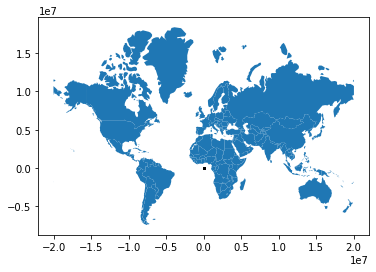

In [3]:
#2 3
wmp = wm.plot()
cmp = cm.plot(ax = wmp, color = 'black', markersize = 2)

<AxesSubplot:>

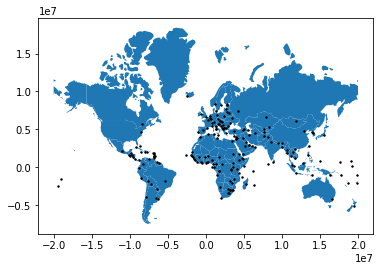

In [4]:
#4
wmp = wm.plot()
cm2 = cm.to_crs(wm.crs)
cm2.plot(ax = wmp, color = 'black', markersize = 2)

## Exercise 2 - Symbol classification

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [6]:
#1
labels = pd.read_csv('hasy-data-labels.csv')
labels = labels[(labels['symbol_id']>=70) & (labels['symbol_id']<=80)]
labels[:10]

,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10
350,hasy-data/v2-00350.png,70,0,10
351,hasy-data/v2-00351.png,70,0,517
352,hasy-data/v2-00352.png,70,0,1001
353,hasy-data/v2-00353.png,70,0,5879
354,hasy-data/v2-00354.png,70,0,6902


In [7]:
i = mpimg.imread(labels['path'][345])
i.shape

(32, 32, 3)

In [8]:
X = []
for path in labels['path']:
    img = mpimg.imread(path)
    img = img.flatten()
    X.append(img)

In [9]:
#2
y = labels['symbol_id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#3
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/home/dmcarmen/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8774509803921569

In [11]:
#4
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.13848039215686275

We see the accuracy of the logistic regression is much beter (0.88 vs. 0.14).

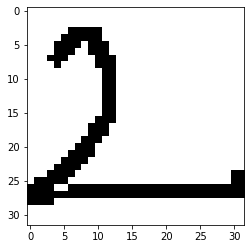

Prediction: 76
Actual:  72


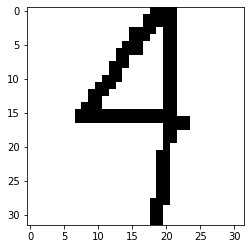

Prediction: 71
Actual:  74


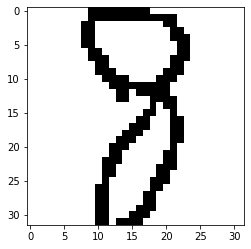

Prediction: 72
Actual:  78


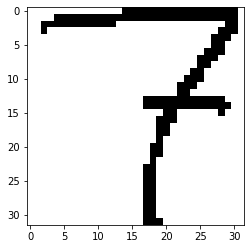

Prediction: 73
Actual:  77


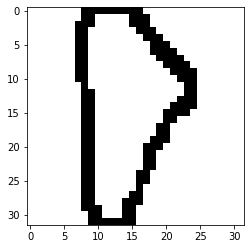

Prediction: 72
Actual:  70


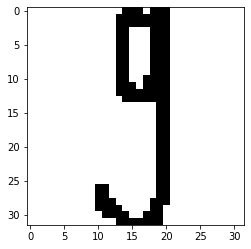

Prediction: 71
Actual:  79


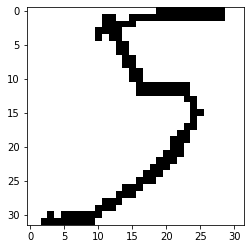

Prediction: 72
Actual:  75


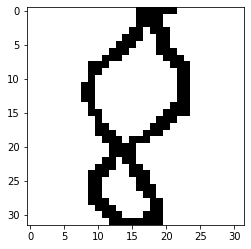

Prediction: 72
Actual:  78


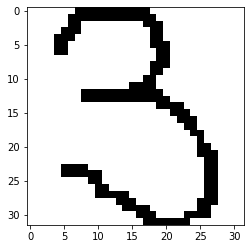

Prediction: 79
Actual:  73


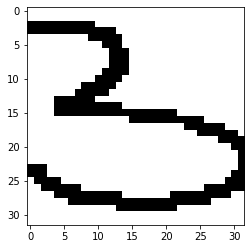

Prediction: 75
Actual:  73


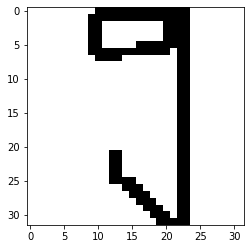

Prediction: 72
Actual:  79


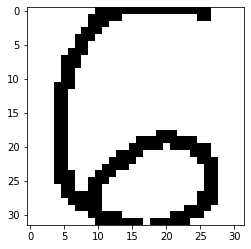

Prediction: 75
Actual:  76


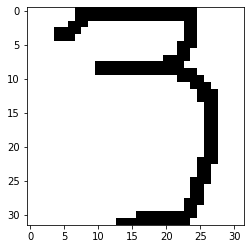

Prediction: 79
Actual:  73


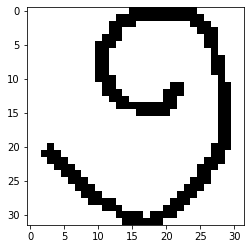

Prediction: 70
Actual:  79


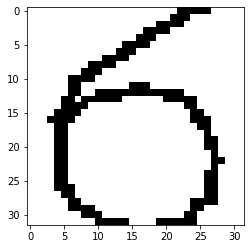

Prediction: 75
Actual:  76


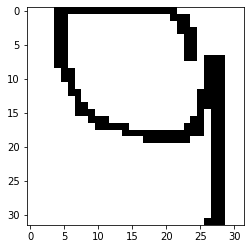

Prediction: 70
Actual:  79


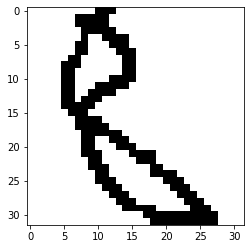

Prediction: 74
Actual:  78


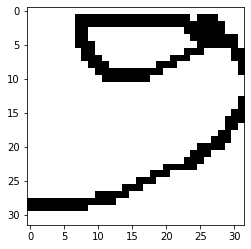

Prediction: 77
Actual:  75


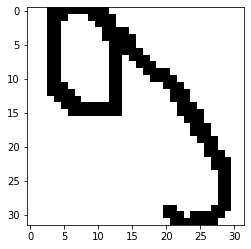

Prediction: 75
Actual:  79


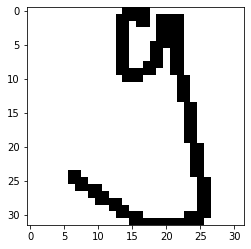

Prediction: 71
Actual:  79


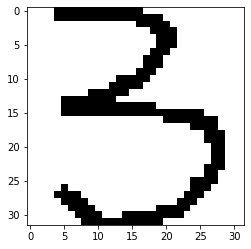

Prediction: 75
Actual:  73


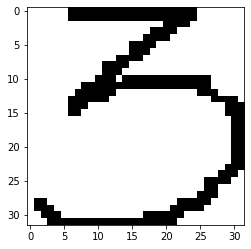

Prediction: 75
Actual:  73


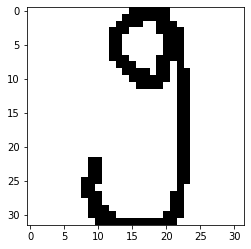

Prediction: 72
Actual:  79


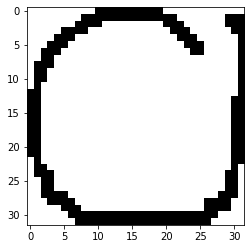

Prediction: 72
Actual:  70


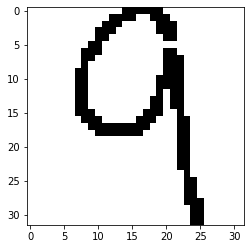

Prediction: 74
Actual:  79


In [12]:
#5
y_pred = logreg.predict(X_test)

wrong = (y_pred!=y_test)

for i in range (len(wrong)):
    if wrong[i]:
        plt.imshow(X_test[i].reshape(32,32,3))
        plt.show()
        print("Prediction:",y_pred[i])
        print("Actual: ",y_test[i])

We can see that the most problematic are numer 9, 8, 6, 3 and 0. Whichever of them have round forms and are kind of similar, so it makes sense the predictor can confuse them.